In [1]:
import os
import random
import cv2

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


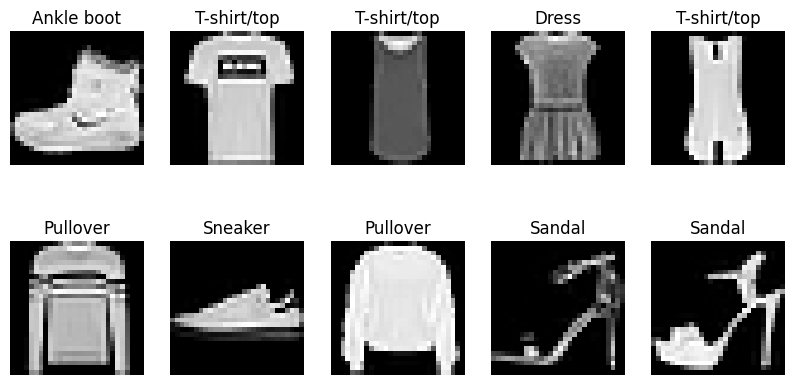

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.dtype, x_train[0].shape

x_train = x_train / 255.0
x_test = x_test / 255.0


class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress',
    'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='leaky_relu'),
    Dense(512, activation='leaky_relu'),
    Dense(512, activation='leaky_relu'),
    Dense(10, activation='softmax')
])

early_stopping_accuracy = EarlyStopping(monitor='val_accuracy',
                                        patience=10,
                                        restore_best_weights=True,
                                        verbose=1)

optimizer = Adam(learning_rate=0.001)
# optimizer = SGD(learning_rate=0.001)
# optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping_accuracy])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 600,330
Trainable params: 600,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 [==============================

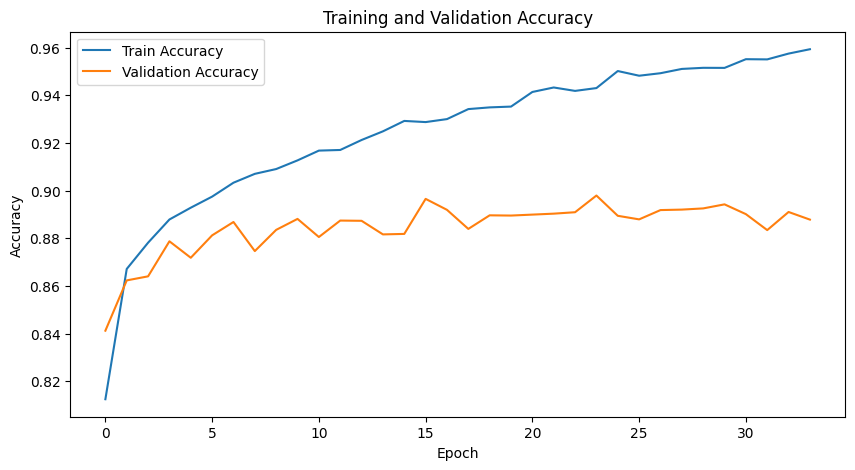

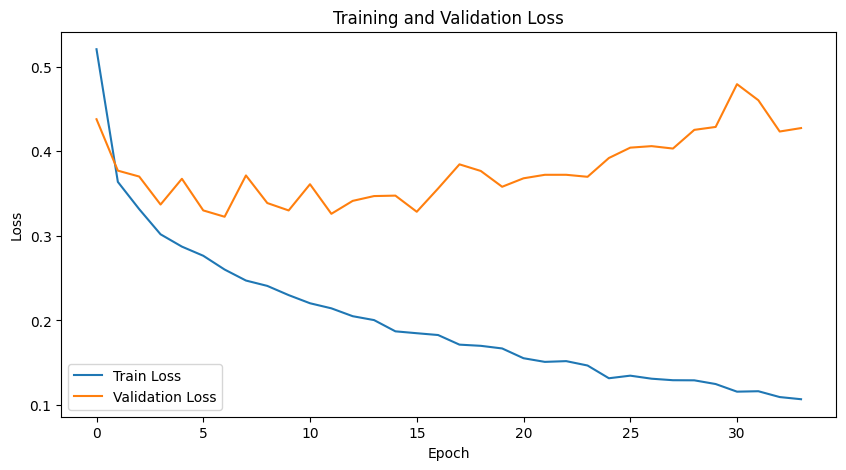

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Loss:", test_loss)

313/313 - 1s - loss: 0.3698 - accuracy: 0.8979 - 871ms/epoch - 3ms/step
Test Accuracy: 89.79%
Test Loss: 0.3697911202907562


## Висновок
Для підвищення точності моделі необхідно враховувати наступне:

1. Зміна кількості та розміру шарів, функцій активації та інших аспектів архітектури впливає на точність моделі.

2. З метою регуляризації моделі та запобігання перенавчанню можна використовувати Dropout. Dropout можна додавати до внутрішніх шарів моделі та встановлювати різні значення ймовірності відключення нейронів.

3. Використання різних функцій активації, таких як ReLU, Leaky ReLU, та інші.

4. Правильна нормалізація вхідних даних допомагає прискорити тренування та покращити стабільність градієнтів.

5. Підбір оптимізатора та learning rate є ключовими факторами.

6. Деякі моделі вимагають більшої кількості епох для досягнення пікової точності.

7. Варто використовувати Early Stopping для автоматичної зупинки тренування та збереження найкращої моделі.

При тренуванні моделі найвища точність була досягнута з чотирма шарами (256 512 512 10), з функцією активації Leaky ReLU, з оптимізатором Adam та learning rate 0.001, кількість epochs 50, розмір batch_size 256.




